# Visualizacion de datos/BI AdmonSIS1


## Librerias

In [53]:
# generales
import pandas as pd
import numpy as  np

# bases de datos
import mysql.connector
import sqlite3 as sql
import psycopg2
import pyodbc

# visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.get_backend()


'module://matplotlib_inline.backend_inline'

## Conexión con base de datos

In [54]:
# configuracion de base de datos
db_config = {
    "host": "127.0.0.1",
    "user": "root",
    "password": "201513417Diego",
    "database": "agenteSalas1"
}


In [55]:
# correr SQL queries en archivo .sql
with open("agenteSalas1.sql", "r") as file:
    sql_queries = file.read()
    
    

In [56]:
# crear conexión con base de datos relacional
#connection = mysql.connector.connect(**db_config) # conexion con base de datos
#cursor = connection.cursor() # cursor

### *** BORRAR CON BASE DE DATOS CONECTADO A SERVIDOR
connection = sql.connect('data1.sqlite') # conexion con base de datos
cursor = connection.cursor() # cursor


In [ ]:
# Execute the queries from the file
#cursor.execute(sql_queries)

## Extraer variables de base de datos

Tablas:columnas

* baneados: usuario(PK), sancion, fecha_sancion, activa
* cantidad salas: sala (PK), total
* doblelogin: usuario (PK)
* equipos: equipo, direccion IP, usuario (PK)
* historial: usuario (PK), equipo, fecha
* historial_ocupacion: hora, sala(PK), ocupacion
* reservaExtendida: id, usuario(PK), fecha_final_reserva



## Queries

* Crédito limite vs. Nombre Cliente
* 

In [60]:
# seleccionar customerName, creditLimit
# tabla: customers

query1 = "SELECT contactLastName, creditLimit FROM customers "
cursor.execute(query1) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# crear variables para visualizacion
nombre_cliente = [row[0] for row in data][:10]
credito_limite = [row[1] for row in data][:10]

nombre_cliente, credito_limite 


list

In [64]:
# seleccionar orderNumber, sum(quantityOrdered) (regla groupby )
# tabla: orderdetails
# groupby: orderNumber

query2 = "SELECT orderNumber, SUM(quantityOrdered) as 'Cantidad Total' FROM orderdetails  GROUP BY orderNumber"
cursor.execute(query2) # ejecutar SQL query
data = cursor.fetchall() # recoger datos

# crear variables para visualizacion
num_orden = [row[0] for row in data][:10]
cantidad_tot = [row[1] for row in data][:10]

num_orden, cantidad_tot 



(['10100',
  '10101',
  '10102',
  '10103',
  '10104',
  '10105',
  '10106',
  '10107',
  '10108',
  '10109'],
 [151, 142, 80, 541, 443, 545, 675, 229, 561, 212])

## Visualizacion de datos
 

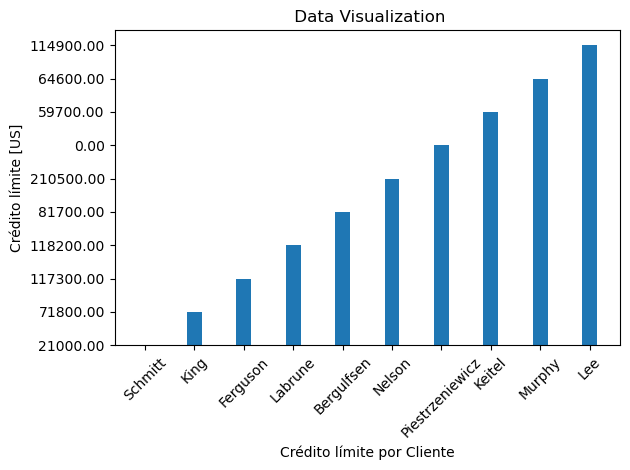

In [65]:
# bar chart bar(x,y,width=w )  
plt.bar(nombre_cliente , credito_limite, width = 0.3)
plt.xlabel("Crédito límite por Cliente")
plt.ylabel("Crédito límite [US]")
plt.title(" Data Visualization")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.legend(loc=4, frameon=False, title='Crédito límite')

# Show the chart
plt.tight_layout()
plt.show()


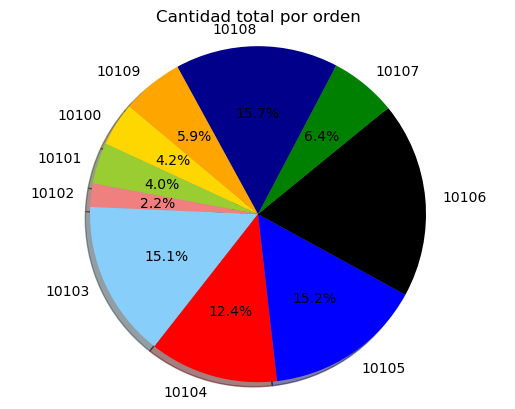

In [73]:
# colores de categorias
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','black','green','darkblue','orange']

# Create a pie chart with custom colors, explosion, and shadow
#explode = (0.1, 0, 0, 0)  # Explode the first slice

plt.pie(cantidad_tot, labels=num_orden, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)

plt.axis('equal')

# Add a title
plt.title('Cantidad total por orden')

# Display the chart
plt.show()

## Apagar Cursor y Conexión con base de  datos

In [ ]:
# Close the cursor and connection
cursor.close()
connection.close()